In [21]:
d <- read.csv('data3a.csv')
fit1 <- glm(y ~ 1, data=d, family=poisson)
fit2 <- glm(y ~ x, data=d, family=poisson)
fit1$deviance - fit2$deviance

[1] 4.513941

# PB法（パラメトリックブートストラップ法）・・・乱数生成に基づくアプローチ

In [23]:
d$y.rnd = rpois(100, lambda = mean(d$y))
fit1 <- glm(y.rnd ~ 1, data=d, family=poisson)
fit2 <- glm(y.rnd ~ x, data=d, family=poisson)
fit1$deviance - fit2$deviance

[1] 0.3474009

以上、帰無仮説（一定モデル）を仮定して、逸脱度の差を計算するのが、PB方の1ステップに相当する。これを繰り返すことで、逸脱度の差の分布を得ることができる。

In [24]:
get.dd <- function(d) {
    n.sample <- nrow(d)
    y.mean <- mean(d$y)
    d$y.rnd <- rpois(n.sample, lambda = y.mean)
    fit1 <- glm(y.rnd ~ 1, data=d, family=poisson)
    fit2 <- glm(y.rnd ~ x, data=d, family=poisson)
    fit1$deviance - fit2$deviance
}

pb <- function(d, n.bootstrap) {
    replicate(n.bootstrap, get.dd(d))
}

dd12 <- pb(d, n.bootstrap = 1000)
summary(dd12)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000001  0.095000  0.443000  0.957700  1.269000 10.340000 

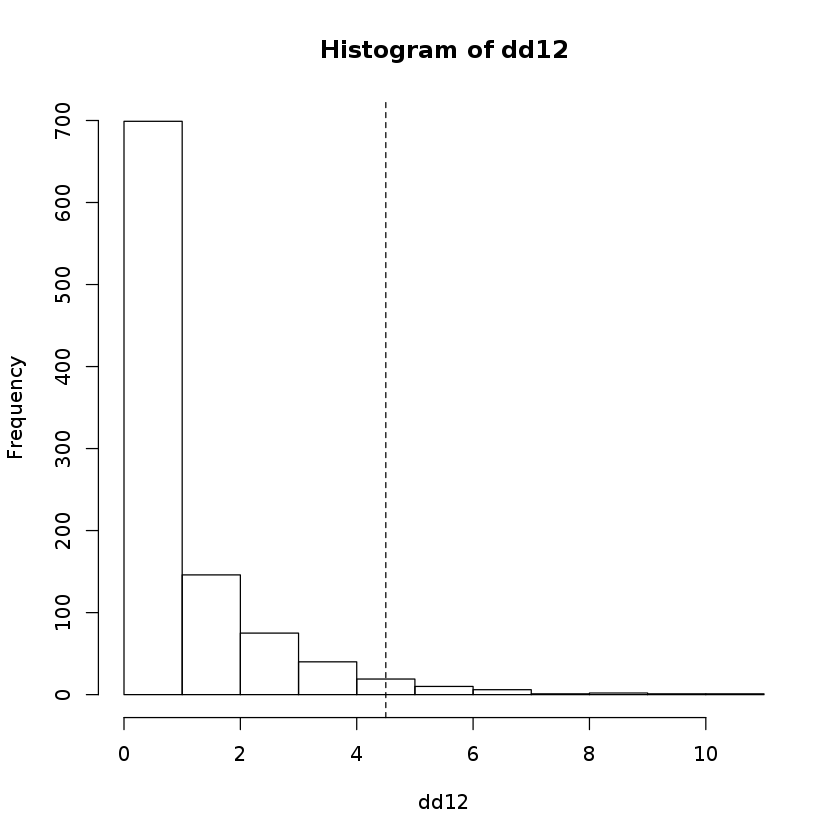

In [26]:
hist(dd12)
abline(v=4.5, lty = 2)

In [27]:
sum(dd12 >= 4.5)

[1] 29

In [29]:
P <- 28 / 1000
P

[1] 0.028

したがって、P < 0.05 なので、有意差がある。帰無仮説（一定モデル）は棄却されて x モデルが残るので、これを採択する。

# $\chi^2$分布を使った近似計算法

In [30]:
fit1 <- glm(y ~ 1, data=d, family=poisson)
fit2 <- glm(y ~ x, data=d, family=poisson)
anova(fit1, fit2, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
1,99,89.50694,NA,NA,NA
2,98,84.993,1,4.513941,0.03361969


$\chi^2$分布近似はサンプルサイズが大きい場合に有効な近似計算。サンプルサイズが小さいバアは、PB法を使ってシミュレーションするのが良い。
等分散正規分布が仮定できる場合には、t分布（平均の差）やF分布（分散比）を使った方が正確な結果を得ることができる。

ただし、あくまで P 値は P 値であって、決して効果の大きさを言うものではない（それは効果量 effect size の仕事）